In [1]:
from random import Random
from math import ceil, sqrt
SEED = 5

In [5]:
def generate_pnts(N = 1000):
    data_x = [Random(5).uniform(a=0, b=1) for _ in range(N)]
    data_y = [Random(5).uniform(a=0, b=1) for _ in range(N)]
    return data_x, data_y

In [3]:
def calc_gradients(x_p, y_p, batch_x, batch_y):
    sum_x , sum_y = 0, 0
    c = -1/len(batch_x)
    for x_i, y_i in zip(batch_x, batch_y):
        inv_sqrt = ( (x_i-x_p) ** 2 + (y_i-y_p) ** 2 ) ** (-0.5)
        sum_x += inv_sqrt*(x_i -x_p)
        sum_y += inv_sqrt*(y_i - y_p)
    return c*sum_x, c*sum_y

In [4]:
def loss(x_p, y_p, batch_x, batch_y):
    return (1/len(batch_x)) * sum(
        [sqrt( (x_i - x_p)**2 + (y_i - y_p)**2) for x_i, y_i in zip(batch_x, batch_y)]
            )


In [34]:
data_x, data_y = generate_pnts()
Sampler = Random(x=SEED)
EPOCHS = 100 # number of times to visit the whole dataset not a batch of the data set
BATCH_sz = 4 # in sgd, number of points contributing to gradient estimation in one update
"""
while iterating through the data we divide it into batches of 4
we want to make sure the algorithm  sees all the data points in the dataset
so we make shuffling to the the indexes
"""
NUM_BATCHES = ceil(len(data_x)/BATCH_sz)
"""
NUM_BATCHES : SIZE OF DATASET / BATCH SIZE rounding up to the nearest integer to be able to iterate
"""
indices = [ i for i in range(len(data_x))]
"""
We iterate on all the batches for each epoch
i.e. we see the whole data in each epoch
i.e. we see a shuffled part of the data for each batch of the data
"""
DELTA = 1e-1
x_p_sgd, y_p_sgd = 0.3, 0.3
x_p_gd, y_p_gd = 0.3, 0.3
losses_sgd = []
losses_sgd_batch = []
losses_gd = []
for _ in range(EPOCHS):
    Sampler.shuffle(indices) # shuffles inplace
    #print(indices[:10])   to make sure that the seeding is working
    #break

    #SGD
    for batch_ind in range(NUM_BATCHES):
        batch_indices = indices[batch_ind * BATCH_sz : (batch_ind+1) * BATCH_sz]
        """
        we want to take the data of size equal to the batch size
        notice that in python slicing the stop index is exclusive
        while the start index is inclusive
        """
        batch_x = [data_x[i] for i in  batch_indices]
        batch_y = [data_y[i] for i in batch_indices]
        #calculate gradients for the batch
        grad_x_sgd, grad_y_sgd = calc_gradients(x_p_sgd,y_p_sgd
                                                ,batch_x,batch_y)
        # updating
        x_p_sgd -= DELTA * grad_x_sgd
        y_p_sgd -= DELTA * grad_y_sgd

        #losses
        """
        Dr said that we are interissted in the loss for the whole data not for a randomly generated shuffled batches thats why we are passing the whole data not the batch data
        This contrasts what I have learned by Andrew Ng so I need to discuss this in the lecture and see the learning curve as well
        """
        losses_sgd.append(loss(x_p_sgd, y_p_sgd, data_x, data_y))

        # andrew : expecting a decreasing trend but more stochastic behaviour on plotting
        losses_sgd_batch.append(loss(x_p_sgd, y_p_sgd, batch_x, batch_y))

    #GD

    #calculate gradients for the batch
    grad_x_gd, grad_y_gd = calc_gradients(x_p_gd,y_p_gd
                                            ,data_x,data_y)
    # updating
    x_p_gd -= DELTA * grad_x_gd
    y_p_gd -= DELTA * grad_y_gd
    losses_gd.append(loss(x_p_gd, y_p_gd, data_x, data_y))


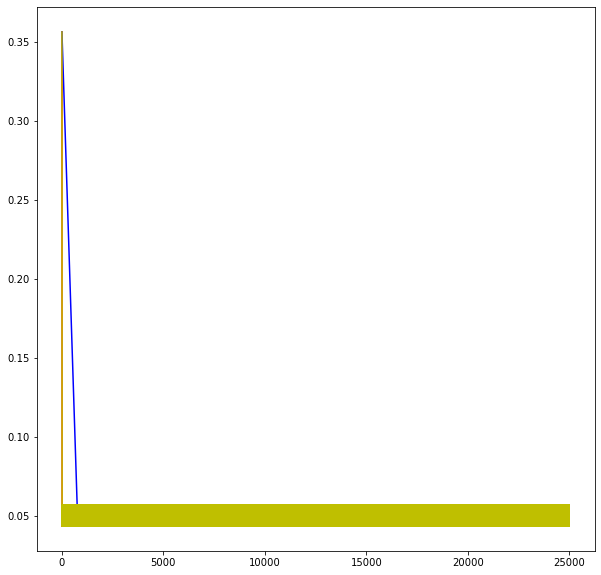

In [37]:
from matplotlib.pyplot import figure
fig = figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.plot(losses_sgd,"r")
ax.plot([ i*NUM_BATCHES for i in range(len(losses_gd))],losses_gd, "b")
ax.plot(losses_sgd_batch,"y")